#Classifier Comparison & Tuning
Compare kNN, SVM, Decision Tree, Random Forest (accuracy bar chart)

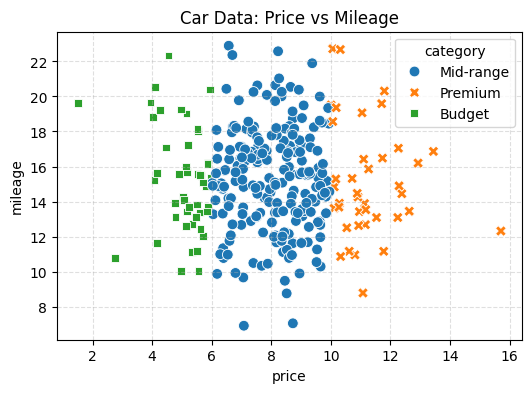

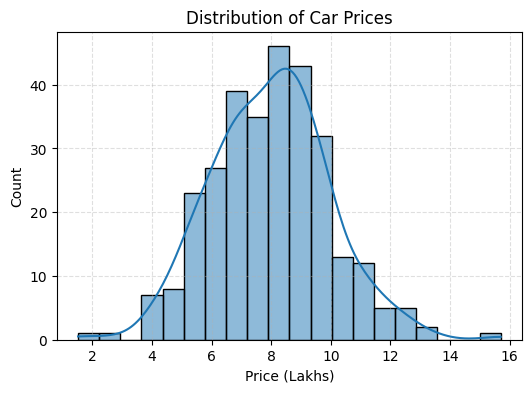

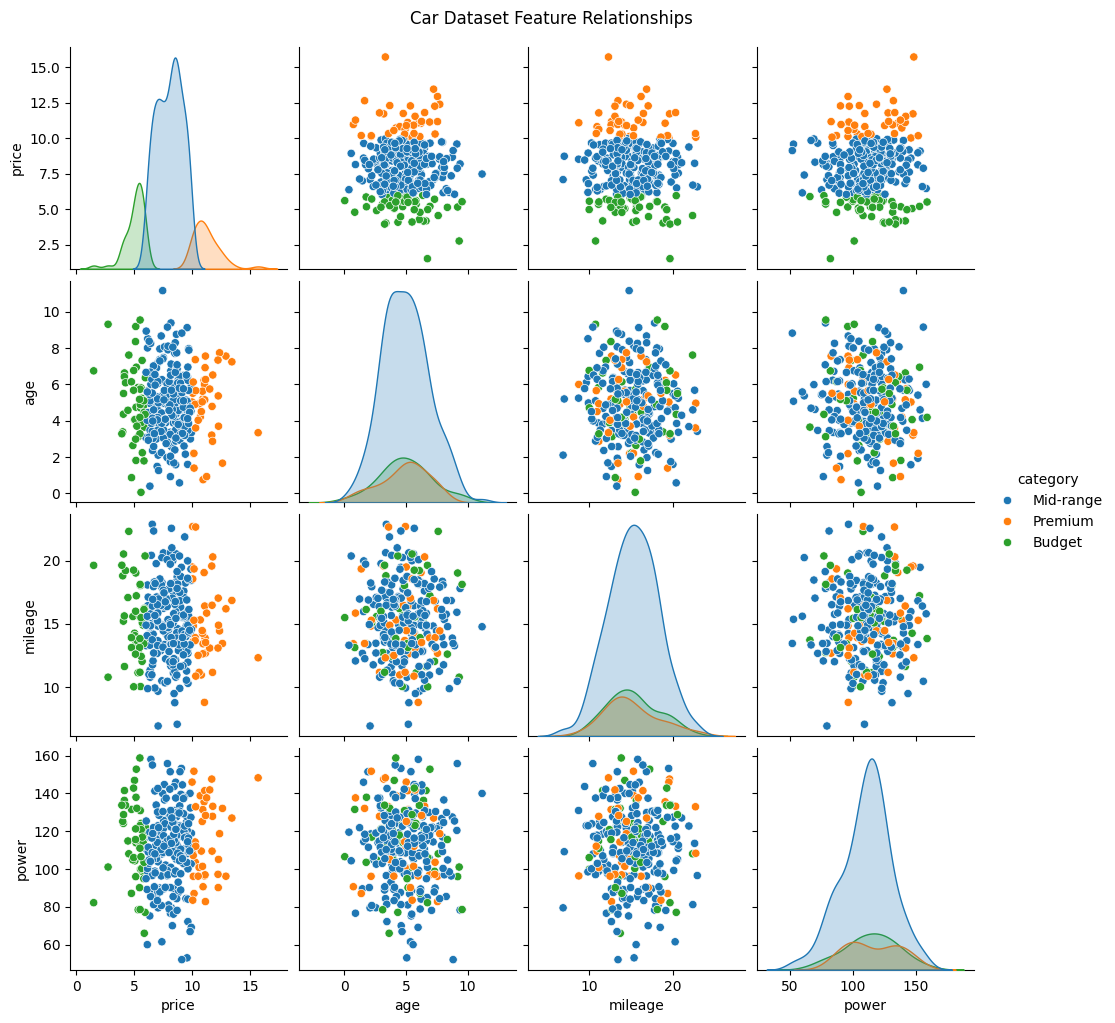

<class 'dict'>
dict_items([('k-NN', KNeighborsClassifier()), ('SVM (RBF)', SVC()), ('Decision Tree', DecisionTreeClassifier(max_depth=4, random_state=0)), ('Random Forest', RandomForestClassifier(max_depth=2, n_estimators=1000, random_state=0))])


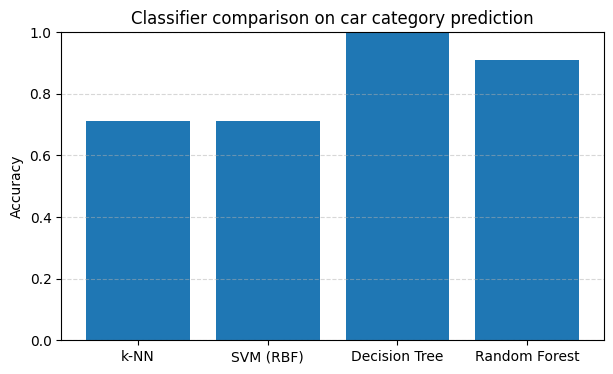

Accuracy scores:
k-NN: 0.711
SVM (RBF): 0.711
Decision Tree: 1.000
Random Forest: 0.911


In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# 1) Create a simple "car price and category" dataset
np.random.seed(42)
n_samples = 300

# Features: price (in lakhs), age (years), mileage (km per litre), engine_power (HP)
price = np.random.normal(8, 2, n_samples)           # 8 lakh average
age = np.random.normal(5, 2, n_samples)             # 5 years old
mileage = np.random.normal(15, 3, n_samples)        # 15 kmpl
power = np.random.normal(110, 20, n_samples)        # 110 HP

X = np.column_stack([price, age, mileage, power])

# Target: car category based on price with some noise
y = np.where(price < 6, "Budget",
     np.where(price < 10, "Mid-range", "Premium"))


# -------------------------
# VISUALIZING THE CAR DATA
# -------------------------

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a DataFrame for easier plotting
df = pd.DataFrame({
    "price": price,
    "age": age,
    "mileage": mileage,
    "power": power,
    "category": y
})

# 1) Scatter Plot: Price vs Mileage (color coded by category)
plt.figure(figsize=(6, 4))
sns.scatterplot(
    data=df, x="price", y="mileage",
    hue="category", style="category", s=60
)
plt.title("Car Data: Price vs Mileage")
plt.grid(True, linestyle="--", alpha=0.4)
plt.show()
print()
# 2) Histogram: Distribution of Car Prices
plt.figure(figsize=(6, 4))
sns.histplot(df["price"], bins=20, kde=True)
plt.xlabel("Price (Lakhs)")
plt.title("Distribution of Car Prices")
plt.grid(True, linestyle="--", alpha=0.4)
plt.show()
print()

# 3) Pairplot: All features vs each other
sns.pairplot(df, hue="category", diag_kind="kde")
plt.suptitle("Car Dataset Feature Relationships", y=1.02)
plt.show()


# 2) Train test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0, stratify=y
)

# 3) Define models
models = {
    "k-NN": KNeighborsClassifier(n_neighbors=5),
    "SVM (RBF)": SVC(kernel="rbf", gamma="scale"),
    "Decision Tree": DecisionTreeClassifier(max_depth=4, random_state=0),
    "Random Forest": RandomForestClassifier(
        n_estimators=1000, max_depth=2, random_state=0
    )
}
print(type(models))
print(models.items())

# 4) Train and evaluate
accuracies = {}
for i, j in models.items():
    j.fit(X_train, y_train)
    y_pred = j.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies[i] = acc

# 5) Plot accuracy comparison
plt.figure(figsize=(7, 4))
plt.bar(accuracies.keys(), accuracies.values())
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.title("Classifier comparison on car category prediction")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

print("Accuracy scores:")
for name, acc in accuracies.items():
    print(f"{name}: {acc:.3f}")


This code builds a small synthetic dataset of cars with features like price, age, mileage and engine power, and class labels like Budget, Mid range and Premium.
It trains four different classifiers and compares their test accuracy on the same train test split.
Finally, it plots a bar chart of accuracy so students can visually see which model performs better on this car classification task.

##Visualizing decision regions for two features (kNN vs SVM)

In [12]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# 1) Create a simple "car price and category" dataset
np.random.seed(42)
n_samples = 300

# Features: price (in lakhs), age (years), mileage (km per litre), engine_power (HP)
price = np.random.normal(8, 2, n_samples)           # 8 lakh average
age = np.random.normal(5, 2, n_samples)             # 5 years old
mileage = np.random.normal(15, 3, n_samples)        # 15 kmpl
power = np.random.normal(110, 20, n_samples)        # 110 HP

X = np.column_stack([price, age, mileage, power])

# Target: car category based on price with some noise
y = np.where(price < 6, "Budget",
     np.where(price < 10, "Mid-range", "Premium"))

# 2) Train test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0, stratify=y
)

print("Car dataset created and split into training and testing sets.")

Car dataset created and split into training and testing sets.


In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# 2) Train kNN and SVM on 2D data
knn_2d = KNeighborsClassifier(n_neighbors=7)
svm_2d = SVC(kernel="rbf", gamma="scale")
knn_2d.fit(X_train_2d, y_train_2d)
svm_2d.fit(X_train_2d, y_train_2d)

# Predictions on the grid for 2D plot (these will be strings)
Z_knn_str = knn_2d.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
Z_svm_str = svm_2d.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Map string labels to numeric for contourf
label_mapping = {"Budget": 0, "Mid-range": 1, "Premium": 2}
Z_knn_numeric = np.vectorize(label_mapping.get)(Z_knn_str)
Z_svm_numeric = np.vectorize(label_mapping.get)(Z_svm_str)

print("k-NN and SVM models trained and predictions made on 2D data.")

k-NN and SVM models trained and predictions made on 2D data.


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# 1) Make a 2D version of the car dataset (price vs mileage) to plot decision boundaries
np.random.seed(0)
n_samples = 250
price = np.random.normal(8, 2, n_samples)
mileage = np.random.normal(15, 3, n_samples)

X_2d = np.column_stack([price, mileage])

y_2d = np.where(price < 6, "Budget",
     np.where(price < 10, "Mid-range", "Premium"))

X_train_2d, X_test_2d, y_train_2d, y_test_2d = train_test_split(
    X_2d, y_2d, test_size=0.3, random_state=0, stratify=y_2d
)

# Create a meshgrid for decision boundary plotting
x_min, x_max = price.min() - 2, price.max() + 2
y_min, y_max = mileage.min() - 3, mileage.max() + 3
xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 200),
    np.linspace(y_min, y_max, 200)
)

print("2D car dataset prepared and meshgrid created for plotting.")

# 2) Train kNN and SVM on 2D data
knn_2d = KNeighborsClassifier(n_neighbors=7)
svm_2d = SVC(kernel="rbf", gamma="scale")
knn_2d.fit(X_train_2d, y_train_2d)
svm_2d.fit(X_train_2d, y_train_2d)

# Predictions on the grid for 2D plot (these will be strings)
Z_knn_str = knn_2d.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
Z_svm_str = svm_2d.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Map string labels to numeric for contourf
label_mapping = {"Budget": 0, "Mid-range": 1, "Premium": 2}
Z_knn_numeric = np.vectorize(label_mapping.get)(Z_knn_str)
Z_svm_numeric = np.vectorize(label_mapping.get)(Z_svm_str)

print("k-NN and SVM models trained and predictions made on 2D data.")

2D car dataset prepared and meshgrid created for plotting.
k-NN and SVM models trained and predictions made on 2D data.


This code uses only two features, price and mileage, so that we can plot how kNN and SVM separate car categories in a 2D plane.
It predicts the class for a grid of points and shows colored decision regions along with the training data.
Students can visually compare how a local model like kNN and a margin based model like SVM carve out different boundaries on the same car data.

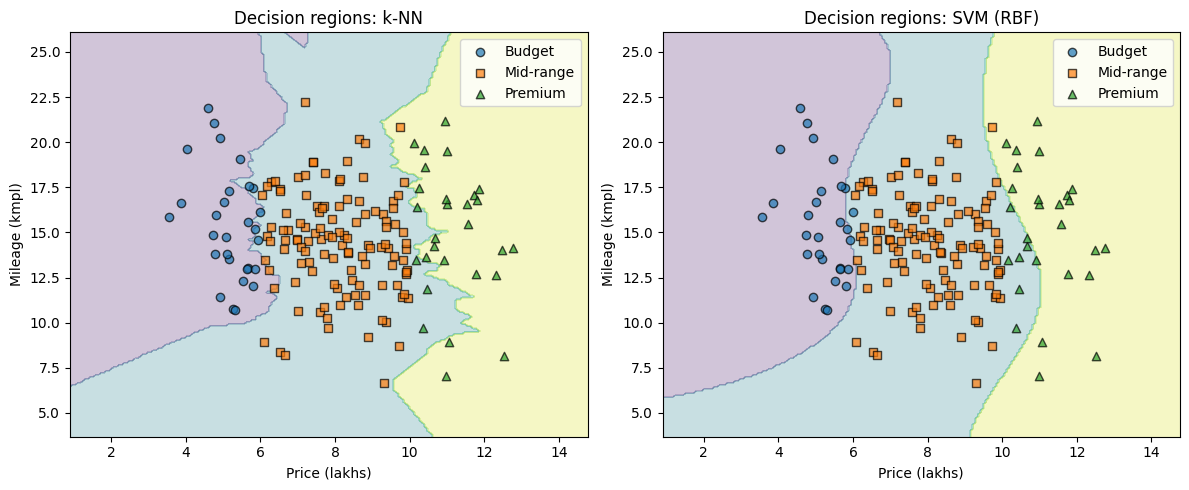

Decision regions for k-NN and SVM plotted.


In [15]:
import matplotlib.pyplot as plt
import numpy as np

# 3) Plot side by side decision boundaries
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for ax, Z_numeric, model_name in zip(
    axes, [Z_knn_numeric, Z_svm_numeric], ["k-NN", "SVM (RBF)"]
):
    ax.contourf(xx, yy, Z_numeric, alpha=0.25, cmap='viridis') # Use numerical Z
    # scatter training points
    for label, marker in zip(["Budget", "Mid-range", "Premium"], ["o", "s", "^"]):
        idx = y_train_2d == label
        ax.scatter(
            X_train_2d[idx, 0], X_train_2d[idx, 1],
            marker=marker, label=label, edgecolor="k", alpha=0.7
        )
    ax.set_xlabel("Price (lakhs)")
    ax.set_ylabel("Mileage (kmpl)")
    ax.set_title(f"Decision regions: {model_name}")
    ax.legend()

plt.tight_layout()
plt.show()

print("Decision regions for k-NN and SVM plotted.")

##2. Hyperparameter Tuning


0.680 0.691 0.749 0.720 0.697 0.714 0.703 0.703 0.680 0.691 0.703 0.697 0.703 0.703 0.703 0.703 0.703 0.703 0.703 0.703 

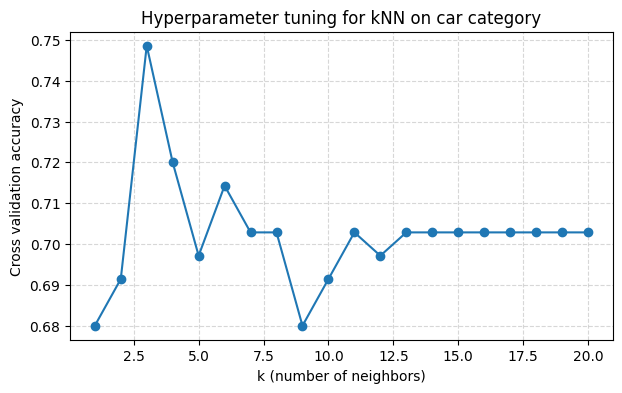

Best k based on CV = 3


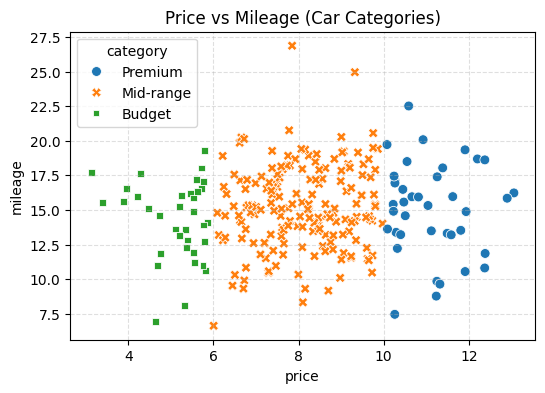

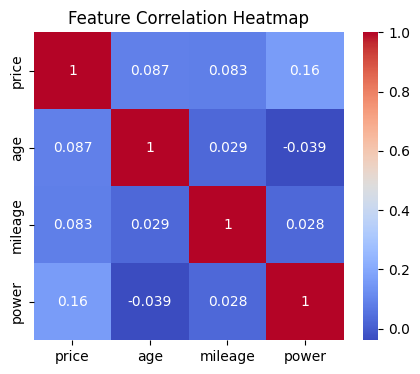

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# 1) Build simple car dataset again
np.random.seed(1)
n_samples = 250
price = np.random.normal(8, 2, n_samples)
age = np.random.normal(5, 2, n_samples)
mileage = np.random.normal(15, 3, n_samples)
power = np.random.normal(110, 20, n_samples)

X = np.column_stack([price, age, mileage, power])
y = np.where(price < 6, "Budget",
     np.where(price < 10, "Mid-range", "Premium"))

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0, stratify=y
)

# 2) Try different k values and compute cross validation accuracy
k_values = range(1, 21)
cv_means = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5)
    cv_means.append(scores.mean())

for i in cv_means:
    print(f"{i:.3f}", end=" ")

# 3) Plot validation accuracy vs k
plt.figure(figsize=(7, 4))
plt.plot(k_values, cv_means, marker="o")
plt.xlabel("k (number of neighbors)")
plt.ylabel("Cross validation accuracy")
plt.title("Hyperparameter tuning for kNN on car category")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

best_k = k_values[int(np.argmax(cv_means))]
print(f"Best k based on CV = {best_k}")

# -----------------------------
# SHORT DATA VISUALIZATION
# -----------------------------
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert to DataFrame for easy plotting
df = pd.DataFrame({
    "price": price,
    "age": age,
    "mileage": mileage,
    "power": power,
    "category": y
})

# 1) Quick scatter plot: Price vs Mileage
plt.figure(figsize=(6, 4))
sns.scatterplot(
    data=df, x="price", y="mileage",
    hue="category", style="category", s=50
)
plt.title("Price vs Mileage (Car Categories)")
plt.grid(True, linestyle="--", alpha=0.4)
plt.show()

# 2) Correlation heatmap (numeric features only)
plt.figure(figsize=(5, 4))
sns.heatmap(df[["price", "age", "mileage", "power"]].corr(),
            annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()




This adds a scatter plot of price versus mileage to help students see how the three car categories spread in feature space.
It also displays a correlation heatmap so students understand relationships between price, age, power and mileage.
These small visualizations are quick but give strong intuition before tuning hyperparameters.

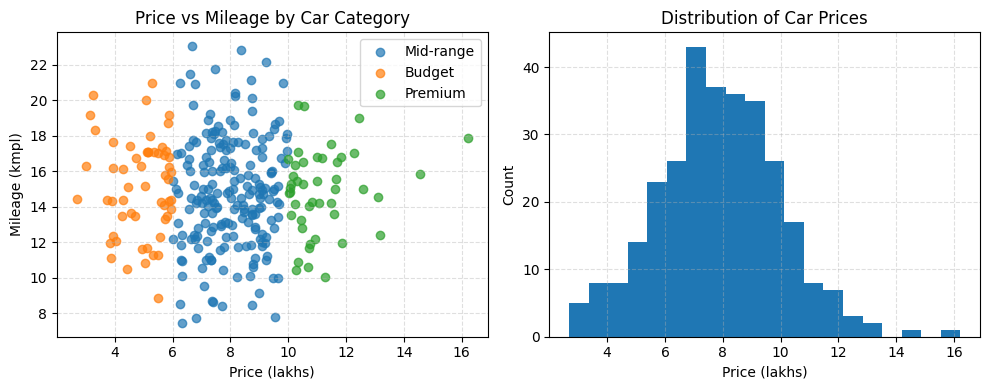

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd

# 1) Car dataset
np.random.seed(2)
n_samples = 300
price = np.random.normal(8, 2, n_samples)
age = np.random.normal(5, 2, n_samples)
mileage = np.random.normal(15, 3, n_samples)
power = np.random.normal(110, 20, n_samples)

X = np.column_stack([price, age, mileage, power])
y = np.where(price < 6, "Budget",
     np.where(price < 10, "Mid-range", "Premium"))

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0, stratify=y
)

# Put into a DataFrame for easy plotting
df = pd.DataFrame({
    "price": price,
    "age": age,
    "mileage": mileage,
    "power": power,
    "category": y
})

# 2) Visualize: Price vs Mileage + Price distribution
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Scatter: price vs mileage colored by category
color_map = {"Budget": "tab:blue", "Mid-range": "tab:orange", "Premium": "tab:green"}
for cat in df["category"].unique():
    mask = df["category"] == cat
    axes[0].scatter(df.loc[mask, "price"],
                    df.loc[mask, "mileage"],
                    label=cat,
                    alpha=0.7)
axes[0].set_xlabel("Price (lakhs)")
axes[0].set_ylabel("Mileage (kmpl)")
axes[0].set_title("Price vs Mileage by Car Category")
axes[0].grid(True, linestyle="--", alpha=0.4)
axes[0].legend()

# Histogram: price distribution
axes[1].hist(df["price"], bins=20)
axes[1].set_xlabel("Price (lakhs)")
axes[1].set_ylabel("Count")
axes[1].set_title("Distribution of Car Prices")
axes[1].grid(True, linestyle="--", alpha=0.4)

plt.tight_layout()
plt.show()


Best params: {'max_depth': 4, 'n_estimators': 10}
Best CV score: 0.9904761904761905


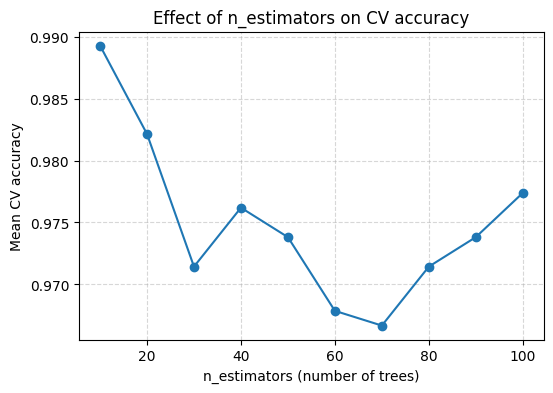

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import pandas as pd

# 1) Define parameter grid for Random Forest
param_grid = {
    "n_estimators": range(10,101,10),  # [10,101,10]
    "max_depth": [2, 4, 6, None]
}

rf = RandomForestClassifier(random_state=0)

grid = GridSearchCV(
    rf,
    param_grid,
    cv=5,
    n_jobs=-1
)

# 2) Fit grid search
grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)
print("Best CV score:", grid.best_score_)

# 3) Put results into DataFrame
results = pd.DataFrame(grid.cv_results_)

# Quick visualization: mean CV score vs number of trees
mean_scores_by_trees = results.groupby("param_n_estimators")["mean_test_score"].mean()

plt.figure(figsize=(6, 4))
plt.plot(mean_scores_by_trees.index, mean_scores_by_trees.values, marker="o")
plt.xlabel("n_estimators (number of trees)")
plt.ylabel("Mean CV accuracy")
plt.title("Effect of n_estimators on CV accuracy")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


Here we define a grid over two hyperparameters of Random Forest: number of trees and maximum depth.
**GridSearchCV tries all combinations using 5-fold cross validation and prints the best parameter set and score.**
We also plot how average CV accuracy changes with number of trees so students see one hyperparameter effect directly.

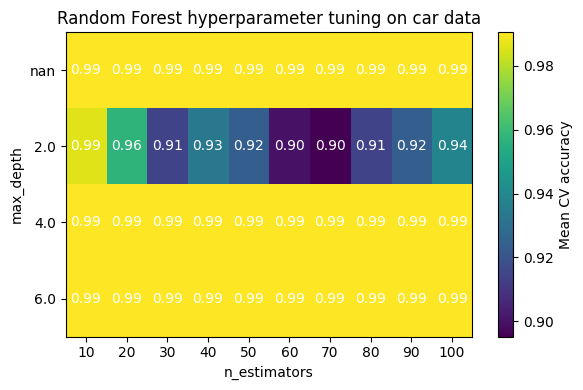

In [19]:
import matplotlib.pyplot as plt

# 1) Pivot results into a table: rows = max_depth, columns = n_estimators
pivot = results.pivot(
    index="param_max_depth",
    columns="param_n_estimators",
    values="mean_test_score"
)

plt.figure(figsize=(6, 4))
im = plt.imshow(pivot, aspect="auto")
plt.colorbar(im, label="Mean CV accuracy")

# 2) Proper tick labels
plt.xticks(range(len(pivot.columns)), pivot.columns)
plt.yticks(range(len(pivot.index)), pivot.index)

plt.xlabel("n_estimators")
plt.ylabel("max_depth")
plt.title("Random Forest hyperparameter tuning on car data")

# 3) Optional: write the accuracy value inside each cell
for i in range(len(pivot.index)):
    for j in range(len(pivot.columns)):
        score = pivot.iloc[i, j]
        plt.text(j, i, f"{score:.2f}", ha="center", va="center", color="white")

plt.tight_layout()
plt.show()


This code runs GridSearchCV on a Random Forest classifier by varying both the number of trees and the maximum depth.
The cross validation results are reshaped into a small matrix and plotted as an image, so darker regions show better hyperparameters.
Students see how systematic search over a grid can find a strong combination of parameters for car category prediction.

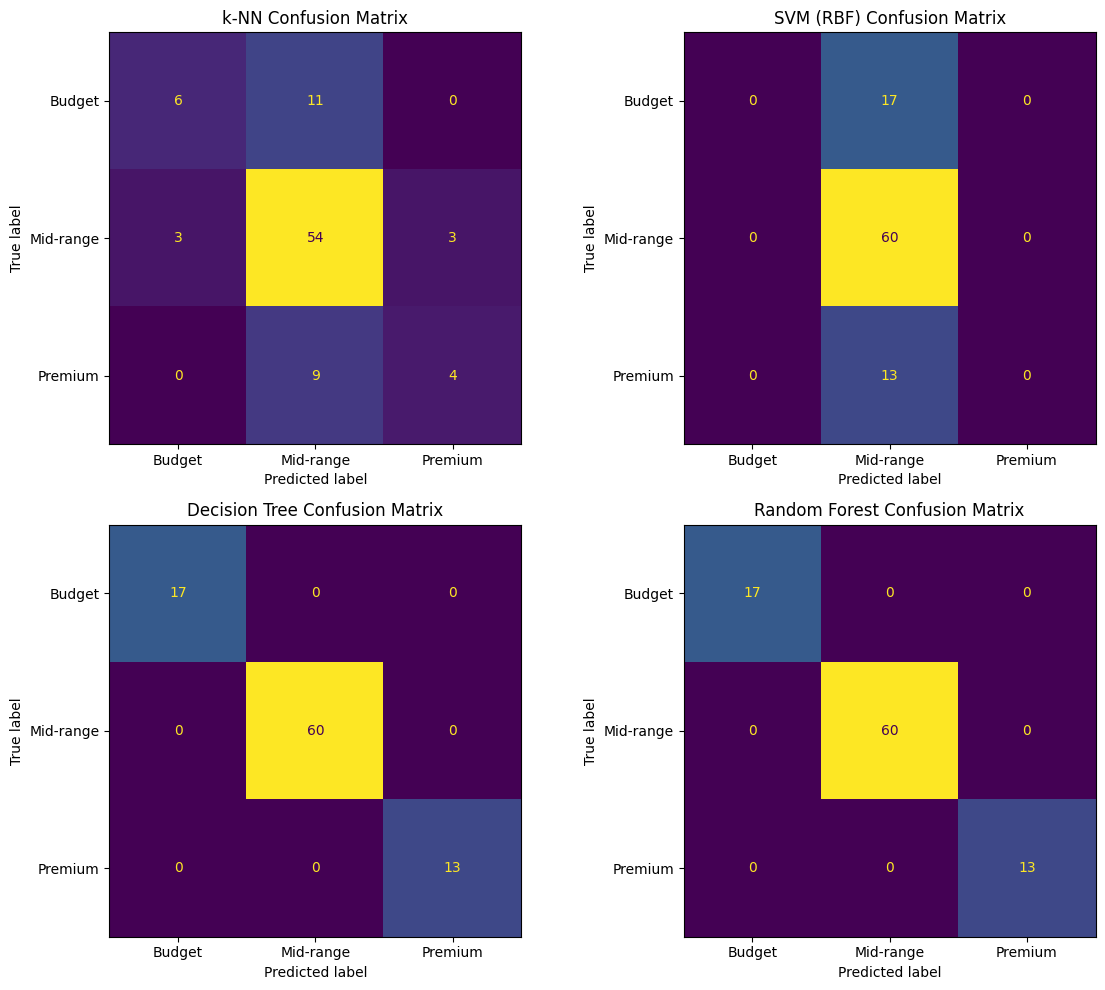

In [20]:
#Confusion matrix of the models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# -------------------------
# BUILD THE 4 MODELS AGAIN
# -------------------------

models = {
    "k-NN": KNeighborsClassifier(n_neighbors=5),
    "SVM (RBF)": SVC(kernel="rbf", gamma="scale"),
    "Decision Tree": DecisionTreeClassifier(max_depth=4, random_state=0),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=4, random_state=0)
}

# Train all models
for name, model in models.items():
    model.fit(X_train, y_train)

# -------------------------
# CONFUSION MATRICES PLOT
# -------------------------

plt.figure(figsize=(12, 10))

i = 1
for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred, labels=["Budget", "Mid-range", "Premium"])

    plt.subplot(2, 2, i)
    disp = ConfusionMatrixDisplay(cm, display_labels=["Budget", "Mid-range", "Premium"])
    disp.plot(ax=plt.gca(), colorbar=False)
    plt.title(f"{name} Confusion Matrix")
    i += 1

plt.tight_layout()
plt.show()


#Neural Networks (Basic)

Learned weights: [-0.39224545  0.81939139 -0.8       ]


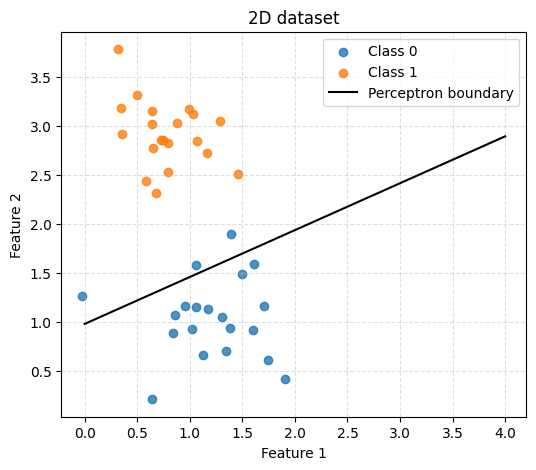

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# 1) Simple 2D toy dataset (linearly separable)
np.random.seed(0)

# Class 0: points around (1, 1)
class0 = np.random.randn(20, 2) * 0.4 + np.array([1, 1])
# Class 1: points around (3, 3)
class1 = np.random.randn(20, 2) * 0.4 + np.array([1, 3])

X = np.vstack([class0, class1])
y = np.array([0] * len(class0) + [1] * len(class1))  # labels 0 and 1

# Add bias term as extra feature 1
X_bias = np.hstack([X, np.ones((X.shape[0], 1))])

# 2) Perceptron training loop
weights = np.zeros(X_bias.shape[1])  # [w1, w2, b]
lr = 0.1
n_epochs = 20

def step(z):
    return np.where(z >= 0, 1, 0)

for epoch in range(n_epochs):
    for xi, target in zip(X_bias, y):
        z = np.dot(weights, xi)
        y_pred = step(z)
        update = lr * (target - y_pred)
        weights += update * xi

print("Learned weights:", weights)

# 3) Visualize data and final decision boundary
plt.figure(figsize=(6, 5))
plt.scatter(class0[:, 0], class0[:, 1], label="Class 0", alpha=0.8)
plt.scatter(class1[:, 0], class1[:, 1], label="Class 1", alpha=0.8)

# Decision boundary: w1*x1 + w2*x2 + b = 0  ->  x2 = (-w1*x1 - b) / w2
x_values = np.linspace(0, 4, 100)
if weights[1] != 0:
    y_values = (-weights[0] * x_values - weights[2]) / weights[1]
    plt.plot(x_values, y_values, "k-", label="Perceptron boundary")

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("2D dataset")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.4)
plt.show()




##Perceptron vs SVM: Key Differences

### **1) Purpose**

* **Perceptron**: Finds *any* line that correctly separates the classes.
* **SVM**: Finds the *best* line by maximizing the margin between classes.

---

### **2) How They Learn**

* **Perceptron**:
  Uses simple update rule when it misclassifies a point:
  *w = w + lr × (target – prediction) × x*
* **SVM**:
  Solves an optimization problem to maximize the margin while classifying points correctly.

---

### **3) Margin**

* **Perceptron**:
  Does **not** consider margin; only checks if prediction is correct or wrong.
* **SVM**:
  Explicitly maximizes the **margin**, making the classifier more stable.

---

### **4) Robustness**

* **Perceptron**:
  Sensitive to noisy data and the order of training samples.
* **SVM**:
  Robust, consistent, and generalizes better, especially with margin maximization.

---

### **5) Line Found**

* **Perceptron**:
  Finds **some** separating line (not guaranteed to be optimal).
* **SVM**:
  Finds the **unique optimal** separating line (maximum-margin hyperplane).

---

### **6) Output Boundary**

* **Perceptron**:
  Boundary might lie close to points → more errors on new data.
* **SVM**:
  Boundary lies in the middle → more stable against new/shifted points.

---

### **7) Use Cases**

* **Perceptron**:
  Good for understanding basics of neural networks; simple linear problems.
* **SVM**:
  Used in real applications (text classification, bioinformatics, image classification).

---

### **8) TLDR Summary**

**Perceptron = any separating line**
**SVM = best separating line (maximum margin)**

